In [2]:
#import packages
import os
import pandas as pd
import numpy as np
from numpy import mean, std, cov 
from numpy.random import seed, randn
import random as rd
from sklearn import preprocessing
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import pyplot

from __future__ import division 
import sys
import scipy
from math import sqrt
import scipy.stats as stats 
from scipy.stats import t, pearsonr, sem
import seaborn as sns
from statistics import mean, stdev

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
print(sys.executable)
!{sys.executable} -m pip install homebrew

/Users/jordansiegel/opt/anaconda3/bin/python


In [7]:
#set paths

current_dir = os.getcwd()
print(current_dir)

/Users/jordansiegel/Documents/GitHub/Rejection_Choice


In [22]:
aq = pd.read_csv('%s/scoring/aq.csv'%(current_dir))
ntbs = pd.read_csv('%s/scoring/ntbs.csv'%(current_dir))
scs = pd.read_csv('%s/scoring/scs.csv'%(current_dir))
srq = pd.read_csv('%s/scoring/srq.csv'%(current_dir))
mspss = pd.read_csv('%s/scoring/mspss.csv'%(current_dir))
rsq = pd.read_csv('%s/scoring/rsq.csv'%(current_dir))
updatedchoicedata = pd.read_csv('shortformdata_DF.csv')
plottingdata = pd.read_csv('longformdata_DF_plotting.csv')

In [77]:

socialselfreport_pca = ''
socialselfreport_pca = pd.DataFrame()
socialselfreport_pca['Prolific_ID'] = aq['Prolific_ID']
socialselfreport_pca['aq'] = aq['AQ']
socialselfreport_pca['ntbs'] = ntbs['NTBS_score']
socialselfreport_pca['rsq'] = rsq['RSQ_finalscore']
socialselfreport_pca['scs'] = scs['SCS_score']
socialselfreport_pca['srqadmiration'] = srq['SRQ_admiration']
socialselfreport_pca['srqnegativesocpot'] = srq['SRQ_negsocpot']
socialselfreport_pca['srqsexualbehavior'] = srq['SRQ_sexrel']
socialselfreport_pca['srqprosocial'] = srq['SRQ_prosocint']
socialselfreport_pca['srqsociability'] = srq['SRQ_sociability']
socialselfreport_pca['mspss'] = mspss['MSPSS_score']
ids = socialselfreport_pca['Prolific_ID']

socialselfreport_pca = pd.DataFrame(data=socialselfreport_pca)
socialselfreport_pca = socialselfreport_pca.drop(['Prolific_ID'], axis =1)
socialselfreport_pca.index = ids
measures = socialselfreport_pca.columns
print(socialselfreport_pca)




                            aq  ntbs     rsq  scs  srqadmiration  \
Prolific_ID                                                        
568d286ab5a2c2000cb6a91c  24.0    34  11.000   77           2.50   
595727bd7c76640001aa8f6e  33.0    31  19.250   38           5.25   
5a4636c92f91ec0001dcba07  32.0    38   4.000   74           4.00   
5ad2c8334d061300011b1985  11.0    32   9.500  102           6.25   
5adef850eb60400001539109  21.0    30  10.375   59           6.00   
...                        ...   ...     ...  ...            ...   
63fac97f0d4e8f6bfd753d90  30.0    32  13.500   62           6.00   
6400d8ca785ee04d9b02ae9c  19.0    33  11.500   60           5.00   
64023a98627b1116180dff0b  30.0    36  13.250   30           5.00   
641361334c91a0c6ff4c5b79  10.0    34   8.125  115           7.00   
641a3df3c874807a1a8734bc  20.0    34   8.750   57           6.25   

                          srqnegativesocpot  srqsexualbehavior  srqprosocial  \
Prolific_ID                        

In [59]:
#sample size
sample_size = len(socialselfreport_pca)
print(sample_size
     )

84


In [60]:
#transpose dataframe so that the rows represent measures and columns represent each participant
socialselfreport_pca = socialselfreport_pca.transpose()
print(socialselfreport_pca)

Prolific_ID        568d286ab5a2c2000cb6a91c  595727bd7c76640001aa8f6e  \
aq                                24.000000                 33.000000   
ntbs                              34.000000                 31.000000   
rsq                               11.000000                 19.250000   
scs                               77.000000                 38.000000   
srqadmiration                      2.500000                  5.250000   
srqnegativesocpot                  1.000000                  2.800000   
srqsexualbehavior                  3.000000                  5.666667   
srqprosocial                       7.000000                  5.600000   
srqsociability                     2.666667                  5.666667   
mspss                              3.666667                  3.083333   

Prolific_ID        5a4636c92f91ec0001dcba07  5ad2c8334d061300011b1985  \
aq                                32.000000                 11.000000   
ntbs                              38.000000       

In [61]:
#return 1st five values of dataframe
print(socialselfreport_pca.head())
#return dimensions of our data matrix: 6 measures by 84 participants
print(socialselfreport_pca.shape)

Prolific_ID    568d286ab5a2c2000cb6a91c  595727bd7c76640001aa8f6e  \
aq                                 24.0                     33.00   
ntbs                               34.0                     31.00   
rsq                                11.0                     19.25   
scs                                77.0                     38.00   
srqadmiration                       2.5                      5.25   

Prolific_ID    5a4636c92f91ec0001dcba07  5ad2c8334d061300011b1985  \
aq                                 32.0                     11.00   
ntbs                               38.0                     32.00   
rsq                                 4.0                      9.50   
scs                                74.0                    102.00   
srqadmiration                       4.0                      6.25   

Prolific_ID    5adef850eb60400001539109  5aec7e89ae13140001fc0cdf  \
aq                               21.000                     20.00   
ntbs                            

In [66]:
#STEP 1: before PCA, scale and center the data
#Standardizarion ensures the range of the continous inital variables each equally contributes to the analysis
scaled_socialselfreport_pca = preprocessing.scale(socialselfreport_pca.T)
# print(scaled_data)
#alternative function: StandardScaler().fit_transform(data.T)
type(scaled_socialselfreport_pca)
scaled_socialselfreport_pca_df = pd.DataFrame(data= scaled_socialselfreport_pca)
# print(scaled_df)
scaled_socialselfreport_pca_df.insert(0,'id',ids)
print(scaled_socialselfreport_pca_df)

                          id         0         1         2         3  \
0   568d286ab5a2c2000cb6a91c  0.178828  0.209067  0.268913  0.087305   
1   595727bd7c76640001aa8f6e  1.305446 -0.532973  2.654282 -1.615142   
2   5a4636c92f91ec0001dcba07  1.180266  1.198454 -1.755036 -0.043652   
3   5ad2c8334d061300011b1985 -1.448509 -0.285627 -0.164790  1.178617   
4   5adef850eb60400001539109 -0.196711 -0.780320  0.088204 -0.698440   
..                       ...       ...       ...       ...       ...   
79  63fac97f0d4e8f6bfd753d90  0.929907 -0.285627  0.991752 -0.567482   
80  6400d8ca785ee04d9b02ae9c -0.447071 -0.038280  0.413481 -0.654787   
81  64023a98627b1116180dff0b  0.929907  0.703760  0.919468 -1.964362   
82  641361334c91a0c6ff4c5b79 -1.573688  0.209067 -0.562351  1.746100   
83  641a3df3c874807a1a8734bc -0.321891  0.209067 -0.381642 -0.785745   

           4         5         6         7         8         9  
0  -2.344092 -0.975396 -1.237835  1.182423 -1.788438 -1.312933  
1  -0

In [67]:
#create PCA object
#sklearn uses objects that can be trained using one dataseet and applied to another dataset
pca = PCA()

#call fit method on scaled data, where all PCA math occurs (i.e. calculate loading scores and the variation each principal component accounts for)
pca.fit(scaled_socialselfreport_pca)


#generate coordinates for PCA graph based on loading scores and scaled data
pca_data = pca.transform(scaled_socialselfreport_pca)
print(pca_data)

[[ 2.12925926e+00  2.84645576e-01  2.44048922e+00  4.18915161e-01
  -3.45115928e-01  4.93735421e-01  4.56359864e-01  1.36859591e+00
   7.40513689e-01 -8.45961831e-01]
 [ 2.89046848e+00 -9.45047664e-01 -2.43369285e+00 -1.26748625e+00
  -6.34642699e-01  1.37294532e-01 -8.14504420e-01 -4.00101983e-01
   7.20140473e-02  1.56063719e-01]
 [ 1.17130265e-01  1.16232743e-01  7.96079262e-01  1.19005537e+00
   1.24569884e+00  5.66838093e-01  1.71995988e+00 -6.29189784e-01
   9.14928216e-01  4.00392787e-02]
 [-1.74599885e+00 -1.15990784e-01  1.64558123e+00  2.19104808e-01
  -7.73942968e-01 -3.40017352e-01 -8.16317103e-01  3.24173607e-01
  -4.39538337e-01 -3.82817299e-01]
 [ 8.25970782e-01 -1.16896923e-01 -1.26834605e+00 -3.57294480e-01
  -1.17093478e+00 -6.91211589e-01  5.95973186e-01 -3.14824440e-01
  -6.93006892e-01 -3.66385760e-01]
 [-4.36831071e-01 -7.47796371e-01 -1.01834158e+00 -1.00844919e+00
  -5.03765765e-01  1.71195929e-01 -4.06021563e-01 -1.85002379e-01
   2.42535315e-01  3.71854514e-01

In [68]:
#calculate the percentage of variation that each principal component accounts for
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)

type(per_var)
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)

In [69]:
#now create labels for scree plot, 1 label per principal component; PC1, PC2, etc
labels = ['PC' +str(x) for x in range(1,len(per_var)+1)]

In [70]:
percs = pd.DataFrame(per_var)
print(per_var)

[29.  16.8 14.6 12.2  7.6  5.7  5.   4.5  2.9  1.8]


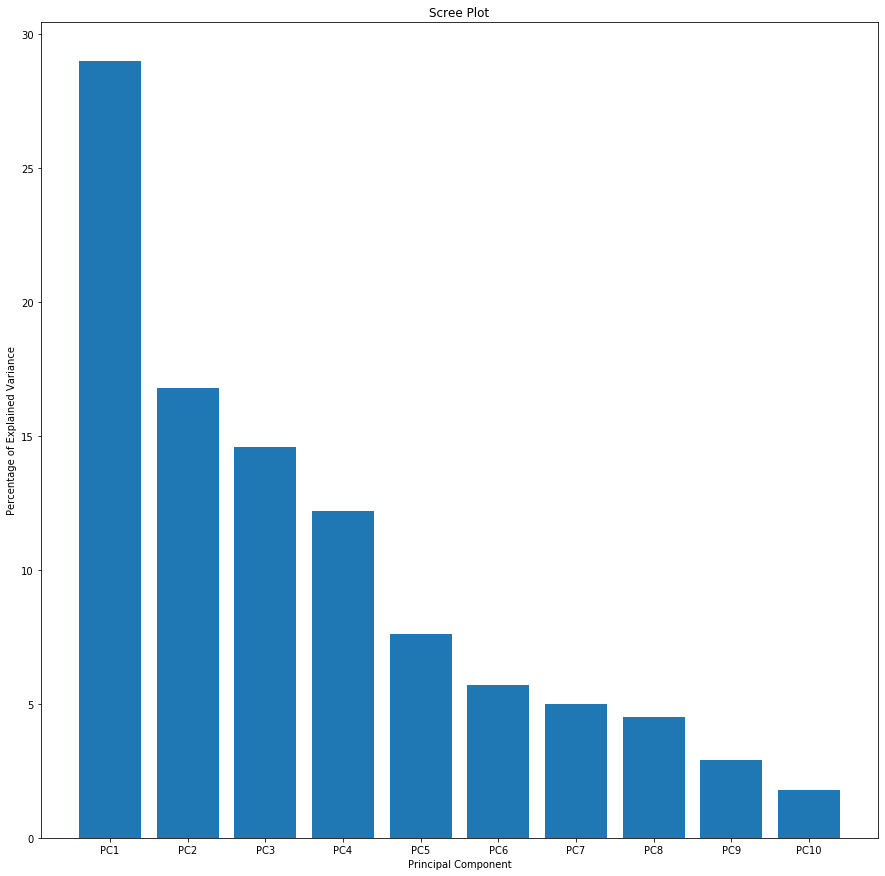

In [85]:
#use matplotlib to create a bar plot
plt.figure(figsize=(15,15))
plt.bar(x=range(1,len(per_var)+1), height= per_var,tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.savefig('PCAskreeplotall.png')
plt.show()

In [72]:
per_var2 = list(per_var[0:3])
print(per_var2)
labels2 = ['PC' +str(x) for x in range(1,len(per_var2)+1)]


[29.0, 16.8, 14.6]


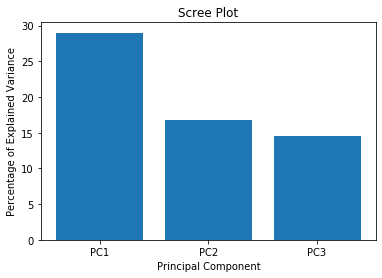

In [86]:
#use matplotlib to create a bar plot
# plt.figure(figsize=(,15))
plt.bar(x=range(1,len(per_var2)+1), height= per_var2,tick_label=labels2)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.savefig('PCAskreeplot_top3.png')
plt.show()

In [74]:
#draw a PCA plot
#first, put the new coordinates created by pca.transform(scaled.data)
#into a matrix where the rows have the participant ids and the columns have PC labels
pca_df = pd.DataFrame(pca_data, index=ids,columns=labels)
print(pca_df)
pca_df.to_csv('rejectionchoice_PCA_allsubjects_socialmeasures.csv')

                               PC1       PC2       PC3       PC4       PC5  \
Prolific_ID                                                                  
568d286ab5a2c2000cb6a91c  2.129259  0.284646  2.440489  0.418915 -0.345116   
595727bd7c76640001aa8f6e  2.890468 -0.945048 -2.433693 -1.267486 -0.634643   
5a4636c92f91ec0001dcba07  0.117130  0.116233  0.796079  1.190055  1.245699   
5ad2c8334d061300011b1985 -1.745999 -0.115991  1.645581  0.219105 -0.773943   
5adef850eb60400001539109  0.825971 -0.116897 -1.268346 -0.357294 -1.170935   
...                            ...       ...       ...       ...       ...   
63fac97f0d4e8f6bfd753d90  0.688245 -1.299655 -0.044593 -0.460121  0.172944   
6400d8ca785ee04d9b02ae9c  0.460055 -0.406253 -0.494477 -1.099819 -0.344582   
64023a98627b1116180dff0b  2.396832 -2.146822 -0.424606 -0.534927 -0.152420   
641361334c91a0c6ff4c5b79 -3.919510  0.399036 -2.620348 -1.099043  0.715975   
641a3df3c874807a1a8734bc -0.475072 -0.207836 -1.240661  0.838874

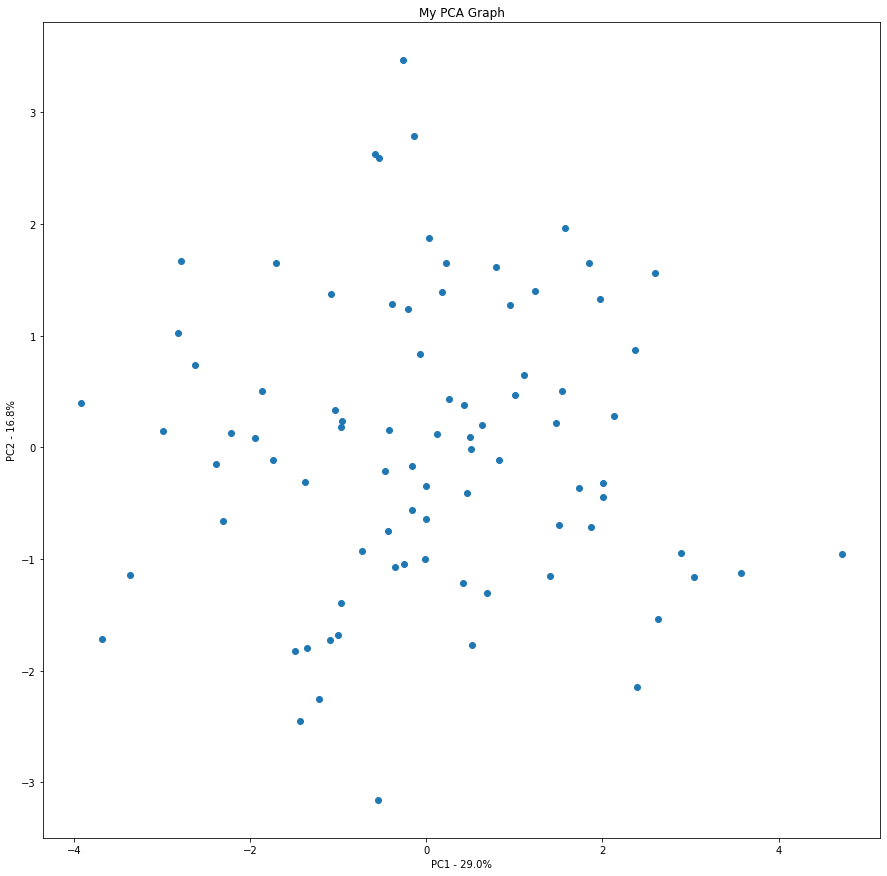

<Figure size 432x288 with 0 Axes>

In [87]:
#Visualize the distribution of the samples
#draw a scatter plot
plt.figure(figsize=(15,15))
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
#add sample names to graph
# for sample in pca_df.index:
#     plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))
plt.show()
plt.savefig('PCAscatterplotall.png')

In [78]:
###All measures and their loading scores for PC 1

#create series obj w/ the loading scores in PC1
loading_scores = pd.Series(pca.components_[0], index=measures)
print(loading_scores)
#sort loading scores based on their magnitude(absolute value)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
#get the names of the top 10 indexes (measure names )
top_measures = sorted_loading_scores.index.values
print(top_measures)

aq                   0.424477
ntbs                -0.139162
rsq                  0.333075
scs                 -0.485114
srqadmiration       -0.355809
srqnegativesocpot   -0.038689
srqsexualbehavior   -0.106910
srqprosocial        -0.109994
srqsociability      -0.321749
mspss               -0.446129
dtype: float64
['scs' 'mspss' 'aq' 'srqadmiration' 'rsq' 'srqsociability' 'ntbs'
 'srqprosocial' 'srqsexualbehavior' 'srqnegativesocpot']


In [80]:
#PC1 - top 10 measures and their corresponding loading scores
print(loading_scores[top_measures])
PC1 = pd.DataFrame(loading_scores[top_measures]).transpose()
print(PC1)
# PC1.to_csv('PC1.csv')

scs                 -0.485114
mspss               -0.446129
aq                   0.424477
srqadmiration       -0.355809
rsq                  0.333075
srqsociability      -0.321749
ntbs                -0.139162
srqprosocial        -0.109994
srqsexualbehavior   -0.106910
srqnegativesocpot   -0.038689
dtype: float64
        scs     mspss        aq  srqadmiration       rsq  srqsociability  \
0 -0.485114 -0.446129  0.424477      -0.355809  0.333075       -0.321749   

       ntbs  srqprosocial  srqsexualbehavior  srqnegativesocpot  
0 -0.139162     -0.109994           -0.10691          -0.038689  


In [81]:
###ALL measures and their loading scores for PC 2
#look at the loading scores for PC2 to determine which measures had the largest influence
#... on separating the two clusters along the x-axis
#create series obj w/ the loading scores in PC1
loading_scores = pd.Series(pca.components_[1], index=measures)
print(loading_scores)
#sort loading scores based on their magnitude(absolute value)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
#get the names of the top 10 indexes (measure names )
top_measures = sorted_loading_scores.index.values

aq                  -0.063582
ntbs                -0.499588
rsq                 -0.303112
scs                  0.272738
srqadmiration       -0.363571
srqnegativesocpot    0.296359
srqsexualbehavior   -0.031327
srqprosocial        -0.431770
srqsociability      -0.358873
mspss                0.209516
dtype: float64


In [82]:
#PC2 -  top 10 measures and their corresponding loading scores
print(loading_scores[top_measures])
PC2 = pd.DataFrame(loading_scores[top_measures]).transpose()
# print(PC2.columns)

ntbs                -0.499588
srqprosocial        -0.431770
srqadmiration       -0.363571
srqsociability      -0.358873
rsq                 -0.303112
srqnegativesocpot    0.296359
scs                  0.272738
mspss                0.209516
aq                  -0.063582
srqsexualbehavior   -0.031327
dtype: float64


In [83]:
###All measures and their loading scores for PC 3

#look at the loading scores for PC2 to determine which measures had the largest influence
#... on separating the two clusters along the x-axis
#create series obj w/ the loading scores in PC1
loading_scores = pd.Series(pca.components_[2], index=measures)
print(loading_scores)
#sort loading scores based on their magnitude(absolute value)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
#get the names of the top 10 indexes (measure names )
top_measures = sorted_loading_scores.index.values

aq                  -0.147769
ntbs                -0.110479
rsq                 -0.084391
scs                  0.099498
srqadmiration       -0.282810
srqnegativesocpot   -0.647988
srqsexualbehavior   -0.180937
srqprosocial         0.486148
srqsociability      -0.375014
mspss                0.198374
dtype: float64


In [84]:
#PC 3 print top 10 measures and their corresponding loading scores
print(loading_scores[top_measures])
PC3 = pd.DataFrame(loading_scores[top_measures]).transpose()
print(PC3.columns)

srqnegativesocpot   -0.647988
srqprosocial         0.486148
srqsociability      -0.375014
srqadmiration       -0.282810
mspss                0.198374
srqsexualbehavior   -0.180937
aq                  -0.147769
ntbs                -0.110479
scs                  0.099498
rsq                 -0.084391
dtype: float64
Index(['srqnegativesocpot', 'srqprosocial', 'srqsociability', 'srqadmiration',
       'mspss', 'srqsexualbehavior', 'aq', 'ntbs', 'scs', 'rsq'],
      dtype='object')
